In [3]:
import tensorflow as tf
print(tf.__version__)

2.6.0


In [4]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [5]:
# Load in the data 
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 # Regularization

print("x_train.shape: ", x_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train.shape:  (60000, 28, 28)


In [6]:
# Data is 2D => 28 x 28, need to make id 3D to pass to NN
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [7]:
# Number of output classes
K = len(set(y_train))
print("# of classes: ", K)

# of classes:  10


In [8]:
# Building the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides = 2, activation='relu')(x) # Increase in the feature maps
x = Conv2D(128, (3, 3), strides = 2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [9]:
# Compile and fit
# Use GPU for this

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 42s 6ms/step - loss: 0.5271 - accuracy: 0.8058 - val_loss: 0.3922 - val_accuracy: 0.8524
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3618 - accuracy: 0.8652 - val_loss: 0.3632 - val_accuracy: 0.8635
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3132 - accuracy: 0.8832 - val_loss: 0.3201 - val_accuracy: 0.8796
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2783 - accuracy: 0.8939 - val_loss: 0.3034 - val_accuracy: 0.8865
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2528 - accuracy: 0.9052 - val_loss: 0.2960 - val_accuracy: 0.8919
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2290 - accuracy: 0.9135 - val_loss: 0.2929 - val_accuracy: 0.8947
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2099 - accuracy: 0.9202 - val_loss: 0.3070 - val_ac

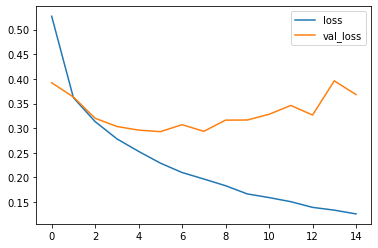

In [10]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

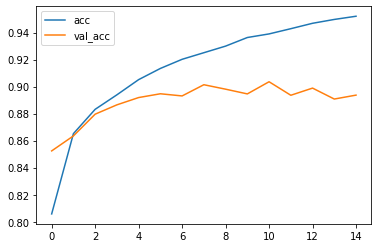

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[846   0  21  21   2   1 104   0   5   0]
 [  4 972   1  15   2   1   3   0   2   0]
 [ 14   2 847  14  42   0  81   0   0   0]
 [ 11   5  13 918  30   0  21   0   1   1]
 [  0   0  60  25 753   0 160   0   2   0]
 [  0   0   0   2   0 959   0  27   0  12]
 [111   1  60  20  54   1 744   0   9   0]
 [  0   0   0   0   0   4   0 954   0  42]
 [  2   0   4   3   4   3   9   2 972   1]
 [  1   0   0   0   0   4   0  23   0 972]]


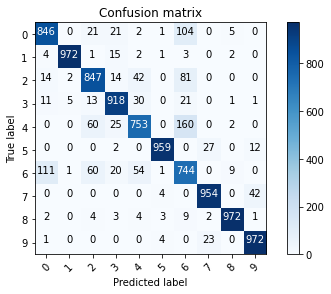

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [13]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

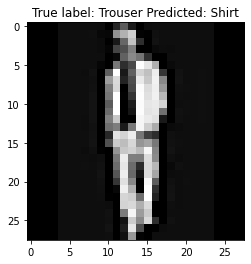

In [14]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));